> Proyek ini bertujuan untuk memprediksi volume lalu lintas menggunakan model Long Short-Term Memory (LSTM)



In [ ]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

**IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


**Data volume lalu lintas simulasi**

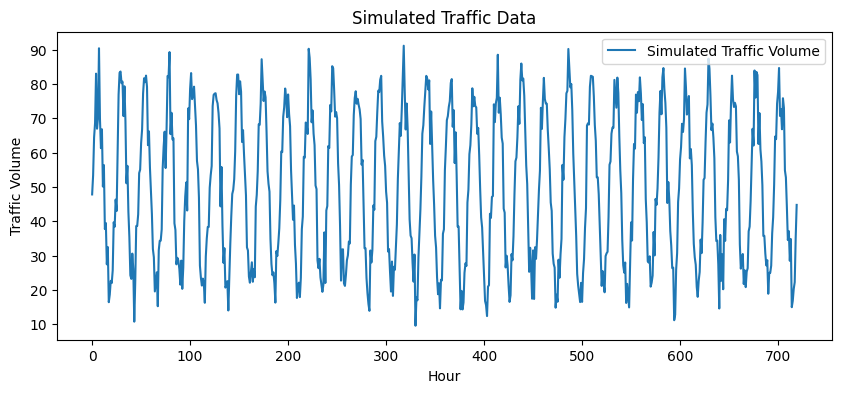

In [ ]:
# Parameter dataset
days = 30
hours_per_day = 24
total_hours = days * hours_per_day

# Simulasi volume trafik dengan pola sinusoidal + noise
time = np.arange(total_hours)
traffic_volume = 50 + 30 * np.sin(2 * np.pi * time / 24) + np.random.normal(0, 5, total_hours)

# Simpan dataset ke DataFrame
df = pd.DataFrame({"hour": time, "traffic_volume": traffic_volume})

# Visualisasi data
plt.figure(figsize=(10, 4))
plt.plot(time, traffic_volume, label="Simulated Traffic Volume")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.title("Simulated Traffic Data")
plt.legend()
plt.show()

**PREPROCESSING**

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
df["traffic_volume"] = scaler.fit_transform(df["traffic_volume"].values.reshape(-1, 1))

# Konversi data ke bentuk sequence
sequence_length = 24  # Gunakan 24 jam sebelumnya untuk prediksi

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Pisahkan menjadi training dan testing set (80% training, 20% testing)
train_size = int(len(df) * 0.8)
train_data, test_data = df["traffic_volume"].values[:train_size], df["traffic_volume"].values[train_size:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
df["traffic_volume"] = scaler.fit_transform(df["traffic_volume"].values.reshape(-1, 1))

# Konversi data ke bentuk sequence
sequence_length = 24  # Gunakan 24 jam sebelumnya untuk prediksi

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Pisahkan menjadi training dan testing set (80% training, 20% testing)
train_size = int(len(df) * 0.8)
train_data, test_data = df["traffic_volume"].values[:train_size], df["traffic_volume"].values[train_size:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Ubah bentuk agar sesuai dengan input LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(df)

     hour  traffic_volume
0       0        0.468900
1       1        0.536798
2       2        0.672539
3       3        0.724294
4       4        0.900249
..    ...             ...
715   715        0.088738
716   716        0.131552
717   717        0.155504
718   718        0.314615
719   719        0.431530

[720 rows x 2 columns]


**INISIASI MODEL**

In [ ]:
# Membangun model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation="relu"),
    Dense(1)
])

# Kompilasi model
model.compile(optimizer="adam", loss="mse")

# Menampilkan arsitektur model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih model dengan jumlah epoch tertentu
epochs = 20
batch_size = 16

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1588 - val_loss: 0.0599
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0577 - val_loss: 0.0140
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0069 - val_loss: 0.0047
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0056 - val_loss: 0.0048
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0042 - val_loss: 0.0049
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0042 - val_loss: 0.0057
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

**HASIL**

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


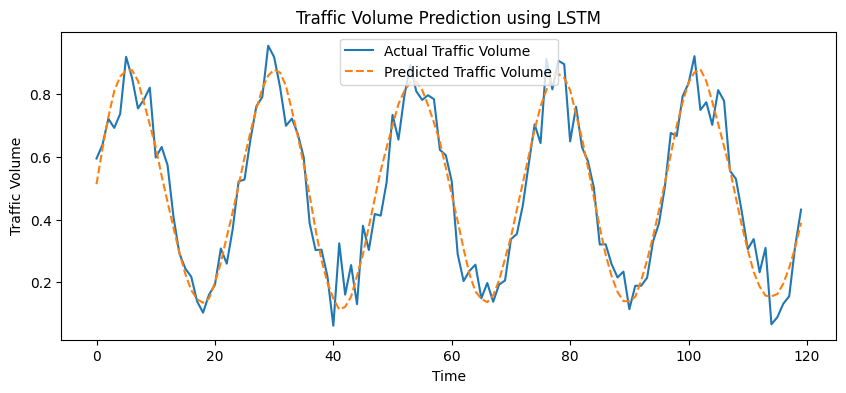

In [ ]:
# Prediksi data uji
predictions = model.predict(X_test)

# Kembalikan data ke skala asli
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualisasi hasil prediksi vs data aktual
plt.figure(figsize=(10, 4))
plt.plot(y_test_actual, label="Actual Traffic Volume")
plt.plot(predictions, label="Predicted Traffic Volume", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Prediction using LSTM")
plt.legend()
plt.show()